# Time Series Prediction with ARIMA 

In [1]:
# Import librairies

In [2]:
import numpy as np
import pandas as pd
#statsmodels est un module Python pour la réalisation de tests statistiques et l’exploration de données statistiques. 
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
#1 - Import dataset

In [4]:
df = pd.read_csv('Desktop/ProjetML/monthly-milk-production-pounds-p.csv')

In [5]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
# 2 - Nettoyage des données - PreProcessing dataset

In [7]:
#Renomer les colonnes
df.columns  = ['Month','Milk production']

In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Milk production
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
#to_datetime() méthode Pandas aide à convertir la chaîne Date heure (Month) en objet Date heure Python
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
#Mettre en place "Month" comme index
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Milk production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk production,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [15]:
# 3 - Data Visualization

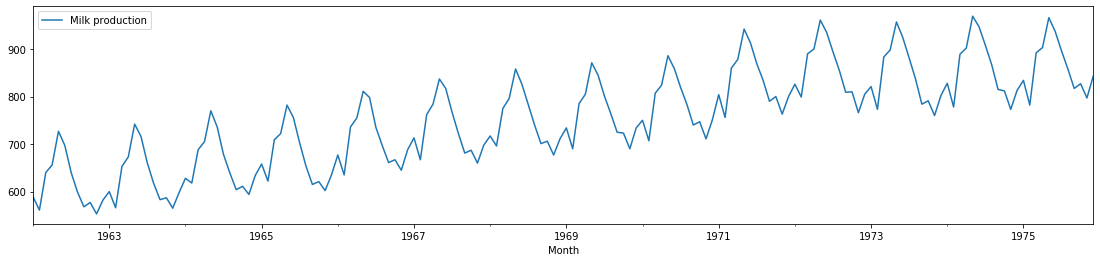

In [16]:
#On observe que la série chronologique présente un modèle de saisonnalité ,Le mois du Mai a toujours un pic 
df.plot(figsize = (19, 4)) 

In [19]:
time_series_predition = df['Milk production']
time_series_predition

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Name: Milk production, Length: 168, dtype: float64

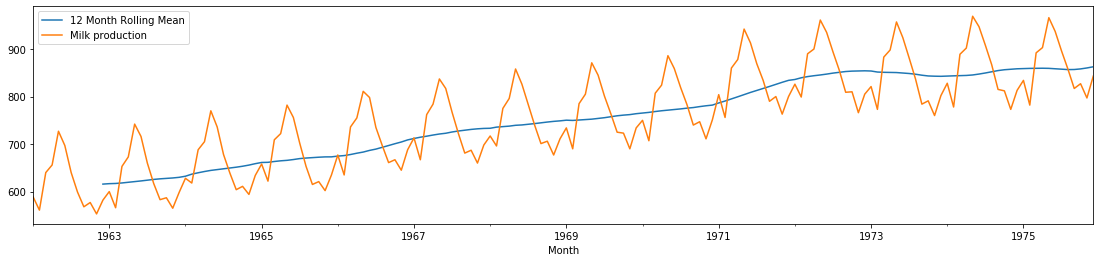

In [20]:
#Calculer la moyenne sur 12 mois
time_series_predition.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series_predition.plot(figsize = (19, 4))
plt.legend()

In [21]:
# 4 -  Train the model Arima

In [22]:
#statsmodels : bibliothèque contenant le modèle SARIMA et d'autres fonctionnalités de statistiques
# ARIMA => AutoRegressive Integrated Moving Average
#Un modèle ARIMA est une classe permettant d'analyser et de prévoir des données de séries chronologiques.

In [23]:
from statsmodels.tsa.arima_model import ARIMA
train_model_arima = sm.tsa.statespace.SARIMAX(df['Milk production'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [24]:
#Le modèle est préparé sur les données d'apprentissage avec la fonction fit () .
results_model_arima = train_model_arima.fit()

In [25]:
results_model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    Milk production   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 14 Nov 2019   AIC                           1074.131
Time:                                    05:57:03   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102     -5.762      0.000      -0.785      -0.387
sigma2        55.5118      5.356     10.365      0.000      45.015      66.009
===================================================================================
Ljung-Box (Q):                       33.48   Jarque-Bera (JB):                32.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.77
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# 5 - Test the model

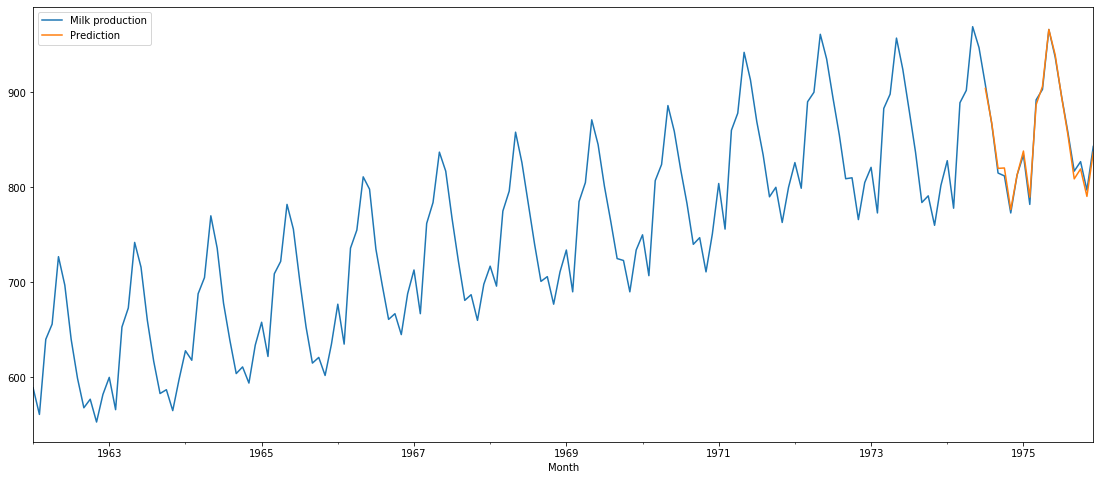

In [27]:
#faire une prediction sur un échantillon de données (du 1974-05 jusqu'à la fin)
df['Prediction'] = results_model_arima.predict(start=150, end=168)
df[['Milk production','Prediction']].plot(figsize=(19,8))

In [28]:
df.tail()

,Milk production,Prediction
Month,,
1975-08-01,858.0,855.358648
1975-09-01,817.0,808.841371
1975-10-01,827.0,819.323185
1975-11-01,797.0,790.427529
1975-12-01,843.0,837.063622


In [29]:
# 6 - Validate the model

In [31]:
#Générer des données de deux ans pour prédire
from pandas.tseries.offsets import DateOffset
future_dates_prediction = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_dates_prediction 

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [32]:
future_dates_dataframe = pd.DataFrame(index=future_dates_prediction ,columns=df.columns)
future_dates_dataframe

,Milk production,Prediction
1976-01-01,NaN,NaN
1976-02-01,NaN,NaN
1976-03-01,NaN,NaN
1976-04-01,NaN,NaN
1976-05-01,NaN,NaN
1976-06-01,NaN,NaN
1976-07-01,NaN,NaN
1976-08-01,NaN,NaN
1976-09-01,NaN,NaN
1976-10-01,NaN,NaN


In [33]:
final_dataframe = pd.concat([df,future_dates_dataframe])
final_dataframe.tail()

,Milk production,Prediction
1977-07-01,NaN,NaN
1977-08-01,NaN,NaN
1977-09-01,NaN,NaN
1977-10-01,NaN,NaN
1977-11-01,NaN,NaN


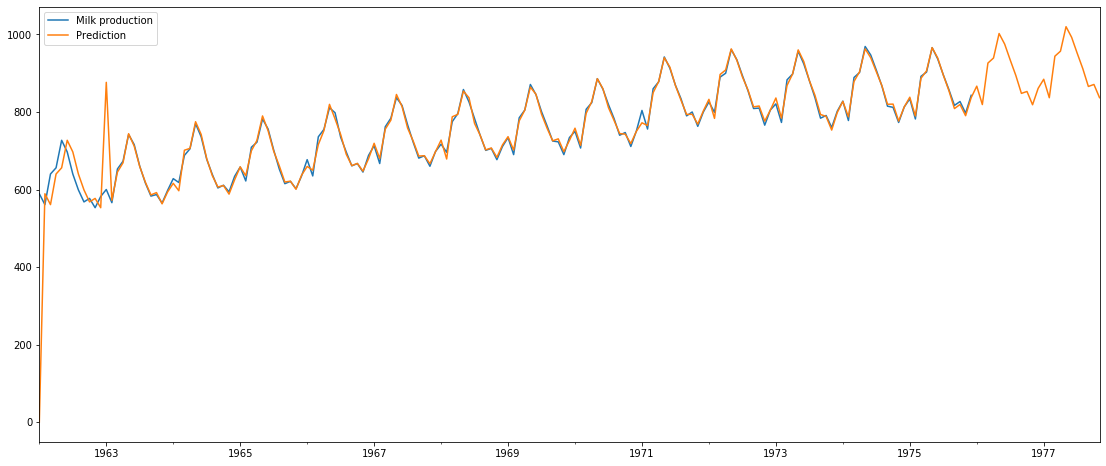

In [34]:
# Prévoir des pas de temps futurs.
final_dataframe['Prediction'] = results_model_arima.predict(starts=169,end=192)
final_dataframe[['Milk production','Prediction']].plot(figsize=(19,8))

In [ ]:
# 7 - Visualiser les prédictions

In [38]:
final_dataframe[['Prediction']].tail()

,Prediction
1977-07-01,951.525866
1977-08-01,911.918956
1977-09-01,865.881181
1977-10-01,871.027294
1977-11-01,836.962995
